## Esercizio di Gruppo: Visualizzazione Videogiochi con Matplotlib

Obiettivo del progetto: In gruppo, analizzate e visualizzate un dataset reale (es. vgsales.csv, relativo alle vendite di videogiochi) per creare una dashboard visiva che mostri tendenze, confronti e distribuzioni nel mercato videoludico.

- Line Plot – Mostra l’andamento nel tempo del numero di videogiochi pubblicati per anno (Year).

Bar Plot – Visualizza le 10 piattaforme con il maggior numero di giochi pubblicati (Platform).

Pie Chart – Mostra la percentuale media delle vendite totali globali (Global_Sales) per Genre.

Histogram – Rappresenta la distribuzione delle vendite in Nord America (NA_Sales).

Scatter Plot – Analizza la relazione tra vendite in Europa (EU_Sales) e in Giappone (JP_Sales), usando colore o marker per distinguere il genere.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

# rimuove i dati mancanti nelle colonne che useremo
df = df.dropna(subset=['Year', 'Platform', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])


Line Plot – Mostra l’andamento nel tempo del numero di videogiochi pubblicati per anno (Year).


Year
1980     9
1981    46
1982    36
1983    17
1984    14
Name: count, dtype: int64


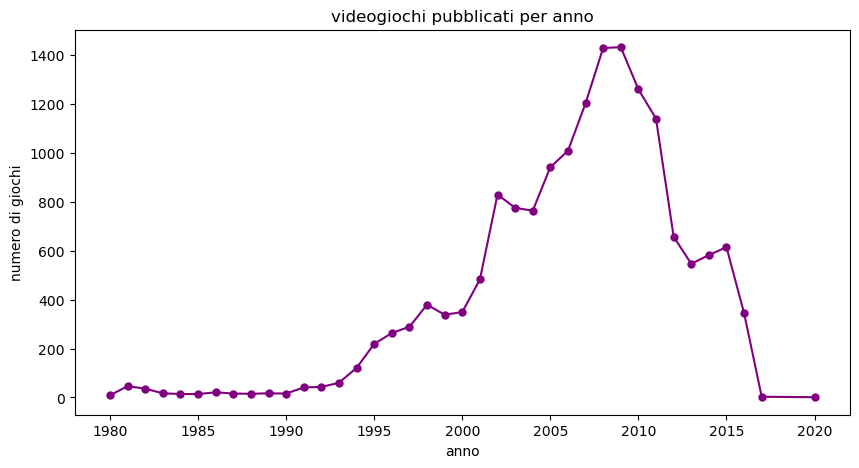

In [3]:
# Conversione dell'anno in intero
df['Year'] = df['Year'].astype(int)

#conto con value quante volte appare in year
#ordina ii dati per anno.sort
giochi_per_anno = df['Year'].value_counts().sort_index()

print(giochi_per_anno.head())

plt.figure(figsize=(10,5))
plt.plot(giochi_per_anno.index, giochi_per_anno.values, marker='o', c= 'purple',ms=5 )
plt.title('videogiochi pubblicati per anno')
plt.xlabel('anno')
plt.ylabel('numero di giochi')
plt.show()


Line Plot – Mostra l’andamento delle vendite globali (Global_Sales) nel tempo raggruppando per anno (Year).


Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
Name: Global_Sales, dtype: float64


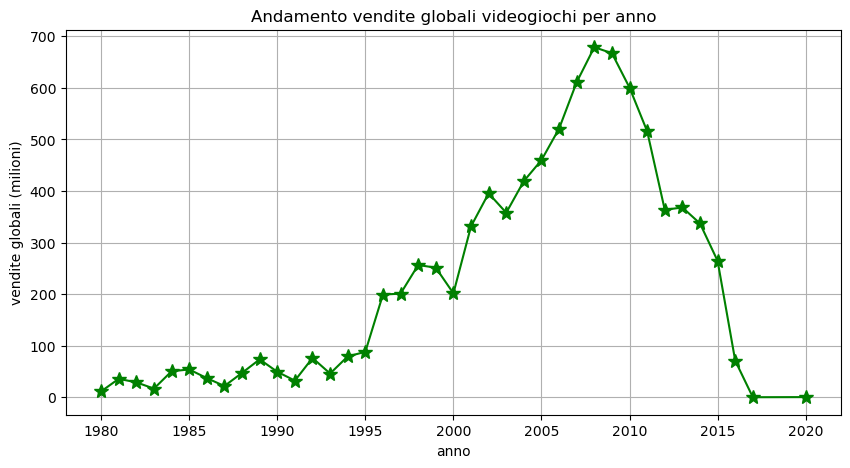

In [4]:
# raggruppa per anno e somma le vendite globali
vendite_per_anno = df.groupby('Year')['Global_Sales'].sum()

print(vendite_per_anno.head())

plt.figure(figsize=(10,5))
plt.plot(vendite_per_anno.index, vendite_per_anno.values, marker='*', color='green', ms=10)
plt.title('Andamento vendite globali videogiochi per anno')
plt.xlabel('anno')
plt.ylabel('vendite globali (milioni)')
plt.grid(True)
plt.show()


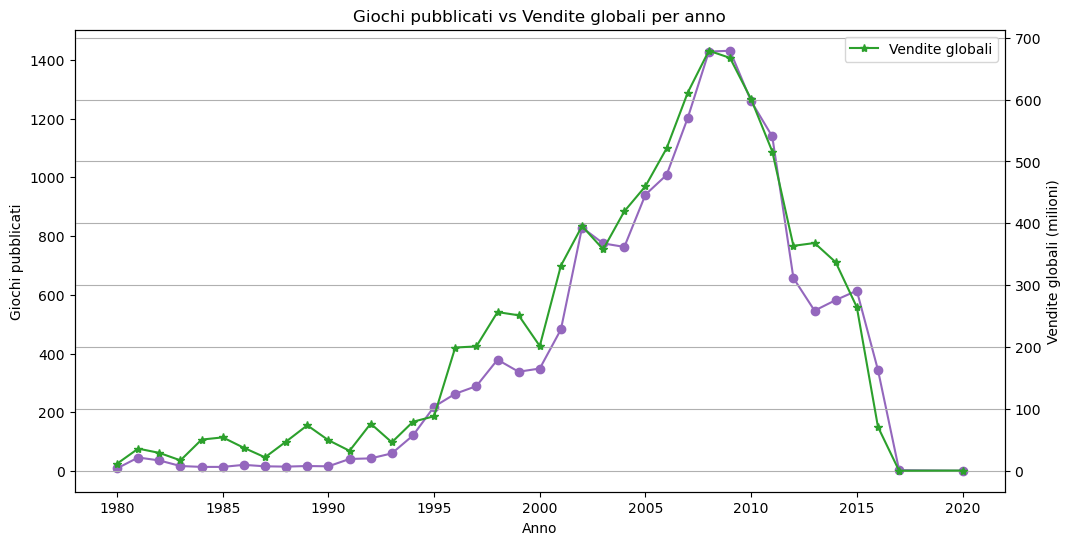

In [5]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:purple'
ax1.set_xlabel('Anno')
ax1.set_ylabel('Giochi pubblicati')
ax1.plot(giochi_per_anno.index, giochi_per_anno.values, color=color, marker='o', label='Giochi pubblicati')

ax2 = ax1.twinx()  # Crea un secondo asse Y
color = 'tab:green'
ax2.set_ylabel('Vendite globali (milioni)')
ax2.plot(vendite_per_anno.index, vendite_per_anno.values, color=color, marker='*', label='Vendite globali')

plt.title('Giochi pubblicati vs Vendite globali per anno')
plt.legend()
plt.grid(True)
plt.show()
